In [2]:
!pip install gseapy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 9.1 MB/s eta 0:00:00


In [3]:
import pandas as pd
import gseapy as gp
import matplotlib.pyplot as plt

In [ ]:
#https://maayanlab.cloud/Enrichr/#libraries

In [6]:
# if you are only intrested in dataframe that enrichr returned, please set outdir=None
enr = gp.enrichr(gene_list="gene_list_TM_0_hr_upregulated.txt",
                 gene_sets=['Reactome_2022','KEGG_2021_Human','WikiPathway_2023_Human'],
                 organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )

In [7]:
enr.results

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,Reactome_2022,Metallothioneins Bind Metals R-HSA-5661231,3/11,0.000095,0.022601,0,0,44.510479,412.387168,MT1F;MT1G;MT1H
1,Reactome_2022,Signaling By Interleukins R-HSA-449147,13/453,0.000138,0.022601,0,0,3.648958,32.435293,ITGAM;IL15;KCNH8;NLRC5;FOS;CXCL2;IL27RA;LMNB1;...
2,Reactome_2022,Toll Like Receptor 4 (TLR4) Cascade R-HSA-166016,7/140,0.000197,0.022601,0,0,6.360026,54.259358,SOCS1;ITGAM;GDNF;KCNH8;NLRC5;FOS;ALPK1
3,Reactome_2022,Response To Metal Ions R-HSA-5660526,3/14,0.000205,0.022601,0,0,32.366358,274.871786,MT1F;MT1G;MT1H
4,Reactome_2022,NGF-stimulated Transcription R-HSA-9031628,4/39,0.000329,0.024476,0,0,13.628227,109.308689,GDNF;KCNH8;ID3;FOS
...,...,...,...,...,...,...,...,...,...,...
880,WikiPathway_2023_Human,Primary Ovarian Insufficiency WP5316,1/170,0.767151,0.779185,0,0,0.688386,0.182472,AMHR2
881,WikiPathway_2023_Human,Metapathway Biotransformation Phase I And II W...,1/184,0.793600,0.802900,0,0,0.635270,0.146859,CYP4F3
882,WikiPathway_2023_Human,Focal Adhesion WP306,1/199,0.818632,0.825002,0,0,0.586695,0.117410,PGF
883,WikiPathway_2023_Human,IL 24 Signaling Pathway WP5413,1/232,0.863577,0.866924,0,0,0.502036,0.073635,ITGAM


Text(0.5, 1.0, 'Up')

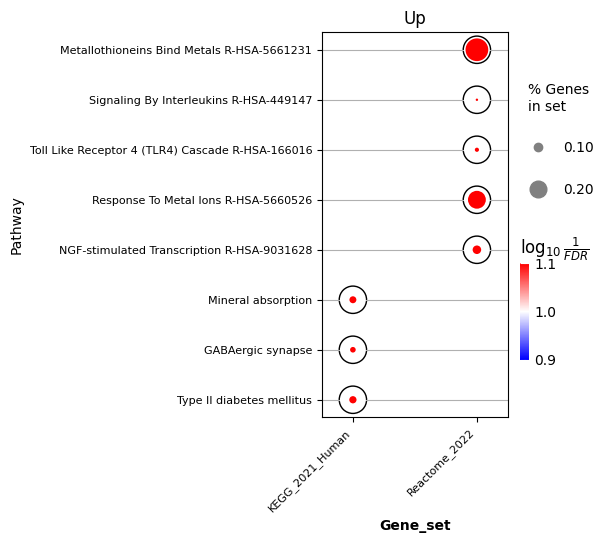

In [60]:
from gseapy import barplot, dotplot

# categorical scatterplot
ax = dotplot(enr.results,
              column="Adjusted P-value",
              x='Gene_set', # set x axis, so you could do a multi-sample/library comparsion
              size=10,
              top_term=5,
              figsize=(3,5),
              title = "KEGG",
              xticklabels_rot=45, # rotate xtick labels
              show_ring=True, # set to False to revmove outer ring
              marker='o',
              cmap='bwr'
             )
ax.set_xlabel('Gene_set', fontsize=10)  # Set x-label with specific font size
ax.set_ylabel('Pathway', fontsize=10)  # Set y-label with specific font size
ax.tick_params(axis='x', labelsize=8)  # Set x-tick label size
ax.tick_params(axis='y', labelsize=8)  # Set y-tick label size
ax.set_title("Up", fontsize=12)  # Change '14' to your desired font size

Text(0.5, 1.0, 'Up')

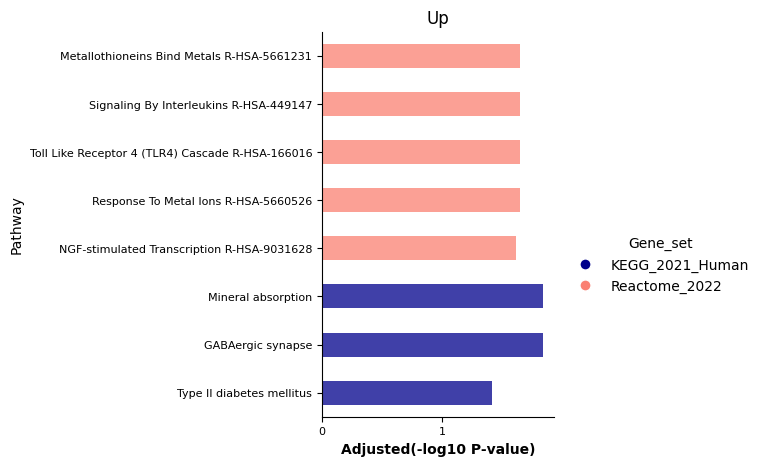

In [65]:
# categorical scatterplot
ax = barplot(enr.results,
              column="Adjusted P-value",
              group='Gene_set', # set group, so you could do a multi-sample/library comparsion
              size=10,
              top_term=5,
              figsize=(3,5),
              #color=['darkred', 'darkblue'] # set colors for group
              color = {'Reactome_2022': 'salmon', 'KEGG_2021_Human':'darkblue','WikiPathway_2023_Human':'green' }
             )
ax.set_xlabel('Adjusted(-log10 P-value)', fontsize=10)  # Set x-label with specific font size
ax.set_ylabel('Pathway', fontsize=10)  # Set y-label with specific font size
ax.tick_params(axis='x', labelsize=8)  # Set x-tick label size
ax.tick_params(axis='y', labelsize=8)  # Set y-tick label size
ax.set_title("Up", fontsize=12)  # Change '14' to your desired font size

In [14]:
import networkx as nx

In [43]:
nodes, edges = gp.enrichment_map(enr.results)

nodes.head()


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,p_inv,Hits_ratio
node_idx,,,,,,,,,,,,
0,Reactome_2022,Na+/Cl- Dependent Neurotransmitter Transporter...,3/19,0.000529,0.025918,0,0,22.246257,167.840350,SLC6A19;SLC6A13;SLC6A12,1.586406,0.157895
1,Reactome_2022,MyD88:MAL(TIRAP) Cascade Initiated On Plasma M...,6/112,0.000393,0.024738,0,0,6.807639,53.389119,SOCS1;GDNF;KCNH8;NLRC5;FOS;ALPK1,1.606627,0.053571
2,Reactome_2022,Cytokine Signaling In Immune System R-HSA-1280215,16/702,0.000333,0.024476,0,0,2.899398,23.216542,ITGAM;IL15;TNFRSF9;KCNH8;NLRC5;TNFRSF11B;FOS;C...,1.611268,0.022792
3,Reactome_2022,NGF-stimulated Transcription R-HSA-9031628,4/39,0.000329,0.024476,0,0,13.628227,109.308689,GDNF;KCNH8;ID3;FOS,1.611268,0.102564
4,Reactome_2022,Response To Metal Ions R-HSA-5660526,3/14,0.000205,0.022601,0,0,32.366358,274.871786,MT1F;MT1G;MT1H,1.645874,0.214286


In [44]:
# build graph
G = nx.from_pandas_edgelist(edges,
                            source='src_idx',
                            target='targ_idx',
                            edge_attr=['jaccard_coef', 'overlap_coef', 'overlap_genes'])

In [16]:
nodes.Hits_ratio

node_idx
0    0.157895
1    0.053571
2    0.022792
3    0.102564
4    0.214286
5    0.050000
6    0.028698
7    0.272727
8    0.083333
9    0.067416
Name: Hits_ratio, dtype: float64

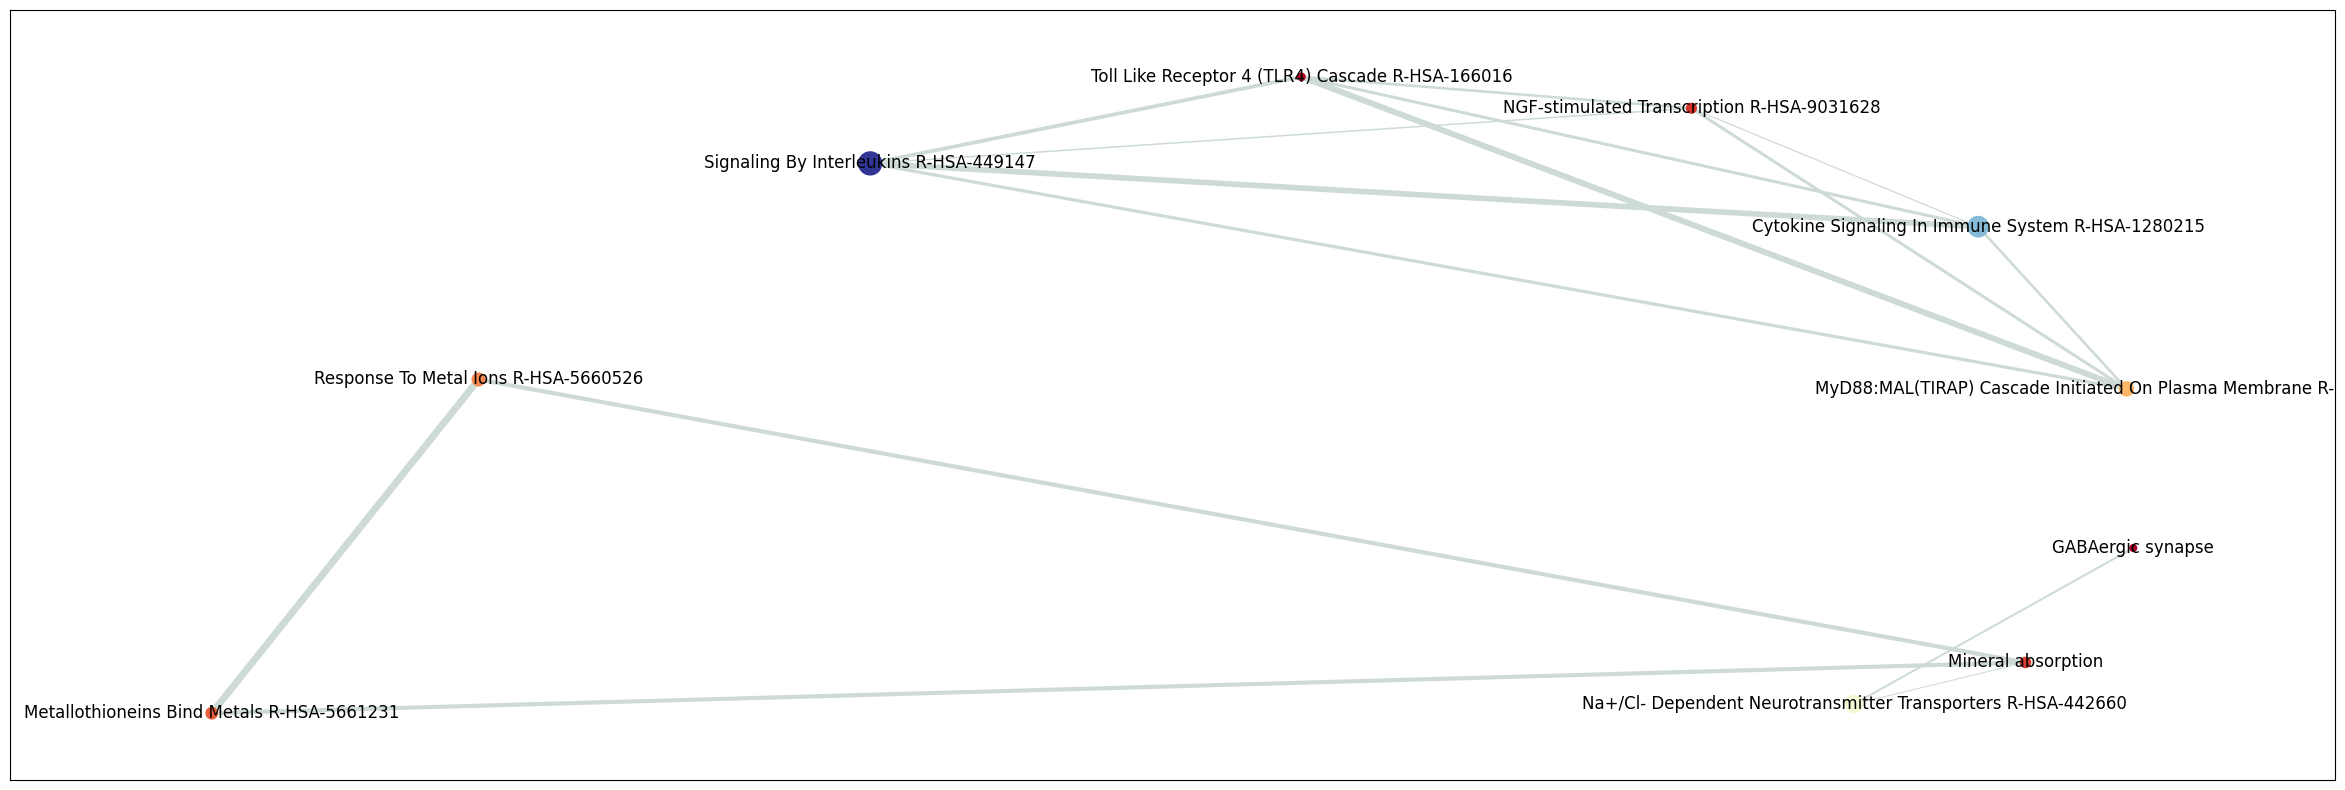

In [51]:
fig, ax = plt.subplots(figsize=(30, 10))

# init node cooridnates
pos=nx.layout.spiral_layout(G)
#node_size = nx.get_node_attributes()
# draw node
nx.draw_networkx_nodes(G,
                       pos=pos,
                       cmap=plt.cm.RdYlBu,
                       node_color=list(nodes.Hits_ratio),
                       node_size=list(nodes.Hits_ratio *1000))
# draw node label
nx.draw_networkx_labels(G,
                        pos=pos,
                        labels=nodes.Term.to_dict())
# draw edge
edge_weight = nx.get_edge_attributes(G, 'jaccard_coef').values()
nx.draw_networkx_edges(G,
                       pos=pos,
                       width=list(map(lambda x: x*5, edge_weight)),
                       edge_color='#CDDBD4')
plt.show()

In [52]:
# if you are only intrested in dataframe that enrichr returned, please set outdir=None
enr_24h_up = gp.enrichr(gene_list="gene_list_TM_24_hr_upregulated.txt",
                 gene_sets=['Reactome_2022','KEGG_2021_Human','WikiPathway_2023_Human'],
                 organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )

Text(0.5, 1.0, 'Up')

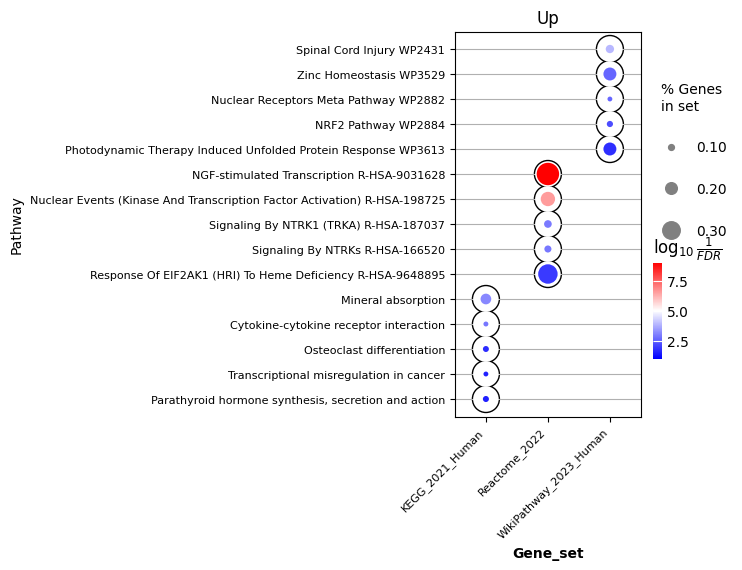

In [57]:

# categorical scatterplot
ax = dotplot(enr_24h_up.results,
              column="Adjusted P-value",
              x='Gene_set', # set x axis, so you could do a multi-sample/library comparsion
              size=7,
              top_term=5,
              figsize=(3,5),
              title = "Up",
              xticklabels_rot=45, # rotate xtick labels
              show_ring=True, # set to False to revmove outer ring
              marker='o',
              cmap='bwr'
             )
ax.set_xlabel('Gene_set', fontsize=10)  # Set x-label with specific font size
ax.set_ylabel('Pathway', fontsize=10)  # Set y-label with specific font size
ax.tick_params(axis='x', labelsize=8)  # Set x-tick label size
ax.tick_params(axis='y', labelsize=8)  # Set y-tick label size
ax.set_title("Up", fontsize=12)  # Change '14' to your desired font size

Text(0.5, 1.0, 'Up')

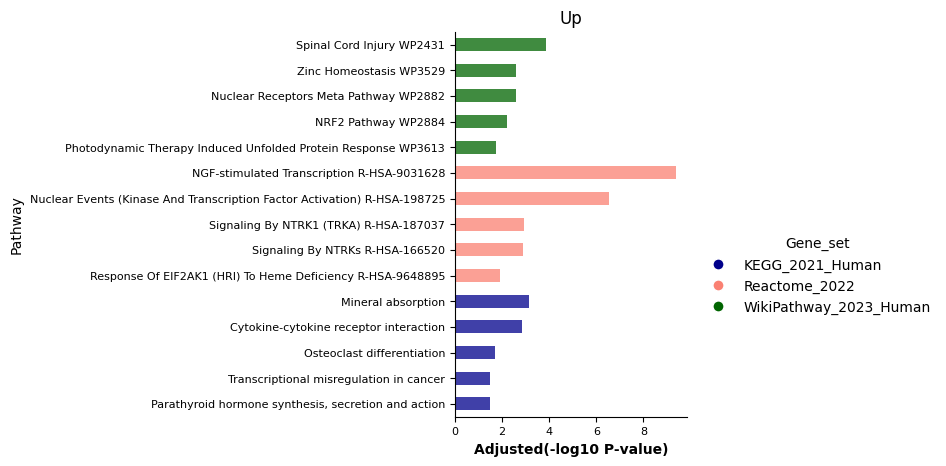

In [66]:
# categorical scatterplot
ax = barplot(enr_24h_up.results,
              column="Adjusted P-value",
              group='Gene_set', # set group, so you could do a multi-sample/library comparsion
              size=10,
              top_term=5,
              figsize=(3,5),
              #color=['darkred', 'darkblue'] # set colors for group
              color = {'Reactome_2022': 'salmon', 'KEGG_2021_Human':'darkblue','WikiPathway_2023_Human':'darkgreen' }
             )
ax.set_xlabel('Adjusted(-log10 P-value)', fontsize=10)  # Set x-label with specific font size
ax.set_ylabel('Pathway', fontsize=10)  # Set y-label with specific font size
ax.tick_params(axis='x', labelsize=8)  # Set x-tick label size
ax.tick_params(axis='y', labelsize=8)  # Set y-tick label size
ax.set_title("Up", fontsize=12)  # Change '14' to your desired font size

In [31]:
nodes, edges = gp.enrichment_map(enr_24h_up.results)

nodes.head()

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,p_inv,Hits_ratio
node_idx,,,,,,,,,,,,
0,WikiPathway_2023_Human,NRF2 Pathway WP2884,15/141,0.000050,0.006266,0,0,3.645549,36.108679,EGR1;SLC6A19;GPX2;HSP90AA1;SRXN1;SLC6A13;PTGR1...,2.202985,0.106383
1,WikiPathway_2023_Human,Zinc Homeostasis WP3529,8/36,0.000015,0.002494,0,0,8.696963,96.658198,SLC30A2;SLC30A4;MT1F;MT1G;MT1X;SLC30A1;MT1H;SL...,2.603174,0.222222
2,WikiPathway_2023_Human,Nuclear Receptors Meta Pathway WP2882,26/314,0.000011,0.002494,0,0,2.790125,31.804561,ABCB1;SRXN1;DNAJB1;SRPX2;FTH1;MYC;ANKRD1;PDE4B...,2.603174,0.082803
3,KEGG_2021_Human,Cytokine-cytokine receptor interaction,25/295,0.000011,0.001418,0,0,2.859733,32.631939,CXCL8;AMHR2;CXCR5;CSF2RB;TNFRSF11B;CXCL2;IL27R...,2.848453,0.084746
4,Reactome_2022,Signaling By NTRKs R-HSA-166520,16/132,0.000005,0.001277,0,0,4.232745,51.367869,EGR1;EGR2;EGR3;EGR4;RRAD;KCNH8;FOS;F3;FOSL1;AR...,2.893947,0.121212


In [32]:
# build graph
G = nx.from_pandas_edgelist(edges,
                            source='src_idx',
                            target='targ_idx',
                            edge_attr=['jaccard_coef', 'overlap_coef', 'overlap_genes'])

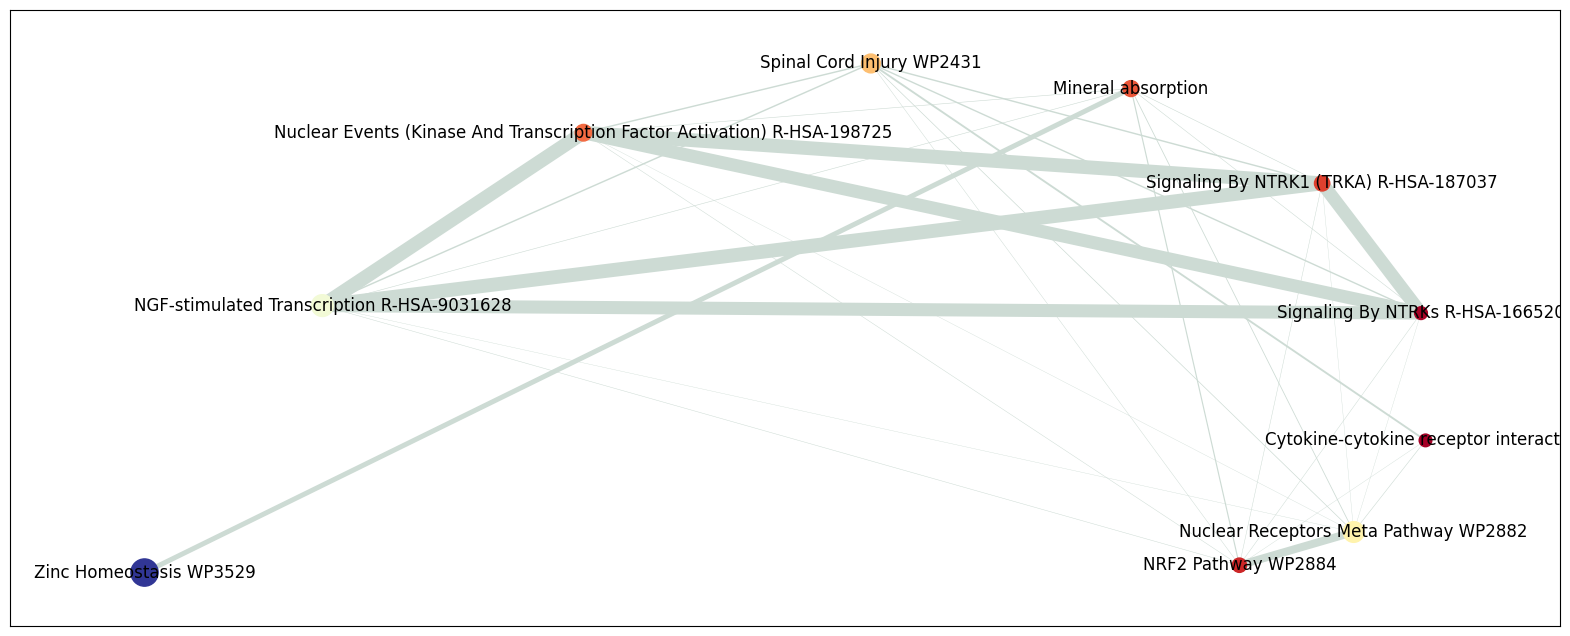

In [41]:
fig, ax = plt.subplots(figsize=(20, 8))

# init node cooridnates
pos=nx.layout.spiral_layout(G)
#node_size = nx.get_node_attributes()
# draw node
nx.draw_networkx_nodes(G,
                       pos=pos,
                       cmap=plt.cm.RdYlBu,
                       node_color=list(nodes.Hits_ratio),
                       node_size=list(nodes.Hits_ratio *1000))
# draw node label
nx.draw_networkx_labels(G,
                        pos=pos,
                        labels=nodes.Term.to_dict())
# draw edge
edge_weight = nx.get_edge_attributes(G, 'jaccard_coef').values()
nx.draw_networkx_edges(G,
                       pos=pos,
                       width=list(map(lambda x: x*10, edge_weight)),
                       edge_color='#CDDBD4')
plt.show()